<a href="https://colab.research.google.com/github/farhanfr/PCVK_Genap_2021/blob/main/Jobsheet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import sys
import glob

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Tugas Praktikum
#1. Buat Gamma Correction sesuai dengan petunjuk berikut 
# Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
# Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
# meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
# dengan gamma correction sesuai rumus yang telah diberikan.

# 2. Buat Simulasi Image Depth
# Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
# pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
# pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
# 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
# 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
# 7bit, maka jumlah warnanya adalah 27 = 128, dst. Karena Visual Studio 2017 bekerja hanya
# pada 8 bit, maka percobaan ini hanya memanipulasi warna sehingga jumlah warnanya
# sesuai dengan kedalamannya. Untuk kasus 7-bit, maka dua warna 8-bit diwakili oleh satu
# warna 7-bit. Contoh pixel warna 0 dan 1 pada 8-bit, diwakili oleh warna 0 pada 7-bit. pixel
# warna 2 dan 3 pada 8-bit, diwakili oleh warna 1 pada 7-bit, dst.

# 3. Buat modul Average Denoising
# Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
# sebelumnya.
# Citra asli sudah disediakan pada /images/galaxy.jpg.
# 100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
# Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
# gunakan modul glob (import glob).
# Dengan menggunakan code diatas, anda tinggal memanggil image difolder tersebut
# menggunakan cv_img[0], cv_img[1], dst.

# 4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/teeth.jpg),
# sedangkan image kanan

# 5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
# Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

 Gamma Correction pada citra 
Masukkan nilai Gamma: 20


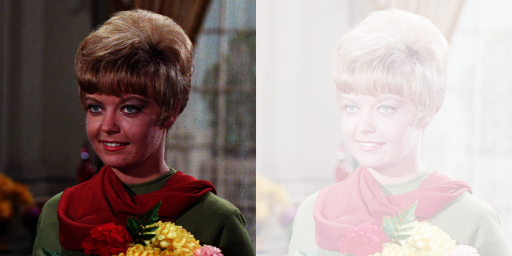

In [3]:
# Jawaban Tugas 1
print('==============================')
print(' Gamma Correction pada citra ')
print('==============================')
try:
  gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
gammaImg = np.zeros(original.shape, original.dtype)

def gammaCorrection(src, gamma):
    invGamma = 1 / gamma
 
    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)
 
    return cv.LUT(src, table)

gammaImg = gammaCorrection(original, gamma)
resultFrame = cv.hconcat((original, gammaImg))
cv2_imshow(resultFrame)

 Simulasi Image Depth 


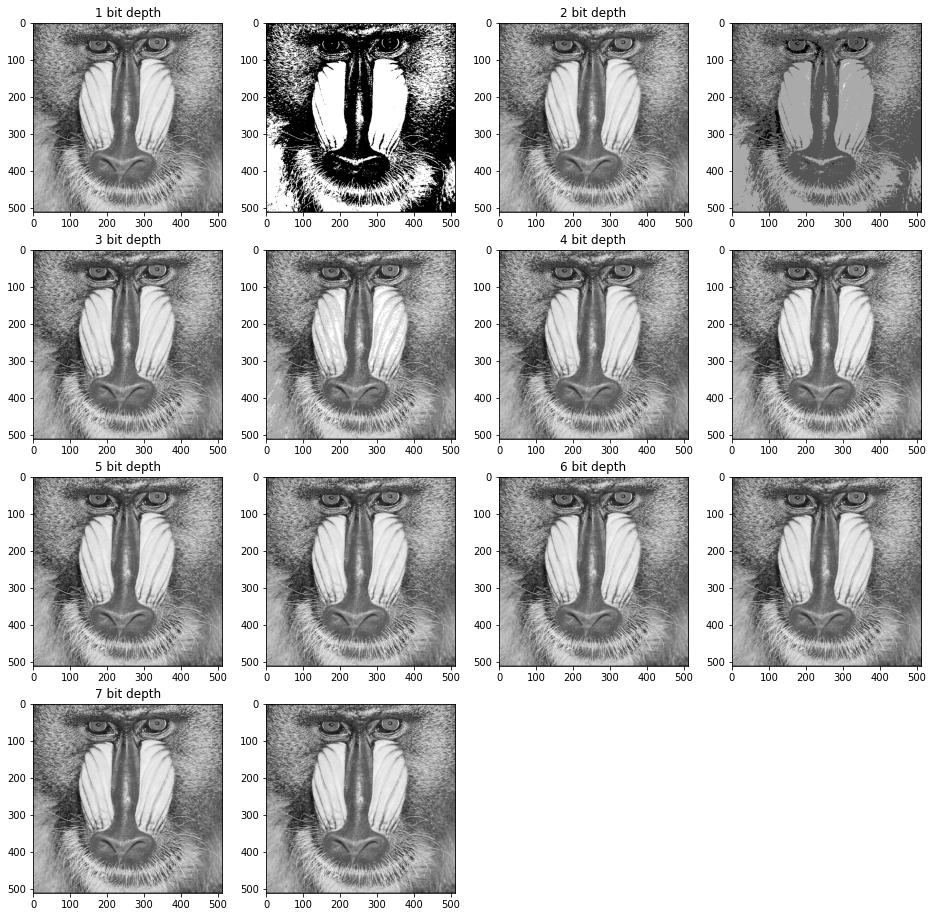

In [4]:
# Jawaban Tugas 2

fig = plt.figure(figsize=(16, 16))
title = ["1 bit depth", "2 bit depth", "3 bit depth", "4 bit depth", "5 bit depth", "6 bit depth", "7 bit depth"]
  
rows = 4
columns = 4

print('=========================')
print(' Simulasi Image Depth ')
print('=========================')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff', cv.IMREAD_GRAYSCALE)
img1 = np.zeros(original.shape, original.dtype)
img2 = np.zeros(original.shape, original.dtype)
img3 = np.zeros(original.shape, original.dtype)
img4 = np.zeros(original.shape, original.dtype)
img5 = np.zeros(original.shape, original.dtype)
img6 = np.zeros(original.shape, original.dtype)
img7 = np.zeros(original.shape, original.dtype)
arr_image = [img1, img2, img3, img4, img5, img6, img7]

for i in range(7):
  depth = i+1
  level = 255 / ((2**depth)-1)
  arr_image[i][:,:] = np.round(original[:,:] / level) * level

indeks = 0
index = 0
for i in range(14):
  fig.add_subplot(rows, columns, i+1)
  if(i%2 == 0):
    plt.title(title[indeks])
    plt.imshow(original, cmap='gray')
    indeks += 1
  else:
    plt.imshow(arr_image[index], cmap='gray')
    index += 1

Average  5
Nilai PSNR (db):  27.54647208876336


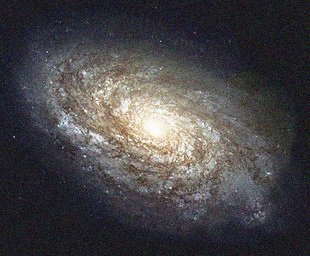



Average  30
Nilai PSNR (db):  27.489995375911427


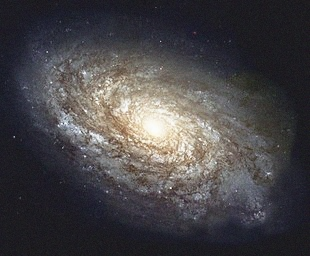



Average  60
Nilai PSNR (db):  27.420432788113033


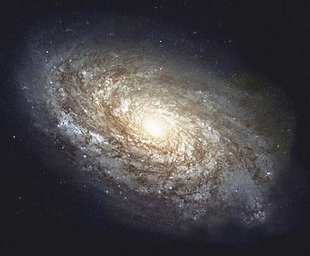



Average  80
Nilai PSNR (db):  27.401675552189992


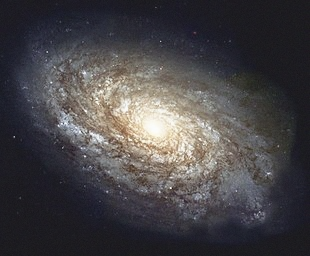



Average  100
Nilai PSNR (db):  27.370931279516654


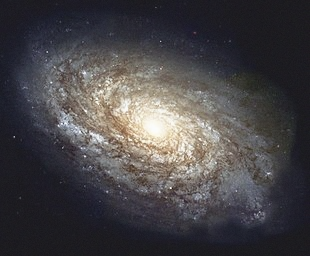

In [6]:
# Jawaban Tugas 3

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/galaxy.jpg')
img1 = np.zeros(original.shape, original.dtype)
img2 = np.zeros(original.shape, original.dtype)
img3 = np.zeros(original.shape, original.dtype)
img4 = np.zeros(original.shape, original.dtype)
img5 = np.zeros(original.shape, original.dtype)
arr_image = [img1, img2, img3, img4, img5]
jumlah_citra = [5, 30, 60, 80, 100]

arrImg = []
for img in glob.glob('/content/drive/MyDrive/PCVK_MM/Images/Images/noises/*.jpg'):
  n= cv.imread(img)
  arrImg.append(n)

def getPSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): 
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

for citra in range(len(jumlah_citra)):
  for i in range(original.shape[0]):
    for j in range(original.shape[1]):
      for c in range(original.shape[2]):
        jumlah = 0
        average = 0
        for n in range(jumlah_citra[citra]):
          jumlah += arrImg[n][i,j,c]
        average = float(jumlah / jumlah_citra[citra])
        arr_image[citra][i,j,c] = average

for i in range(len(jumlah_citra)):
  print("Average ", jumlah_citra[i])
  print("Nilai PSNR (db): ", getPSNR(original, arr_image[i]))
  cv2_imshow(arr_image[i])
  print("\n")

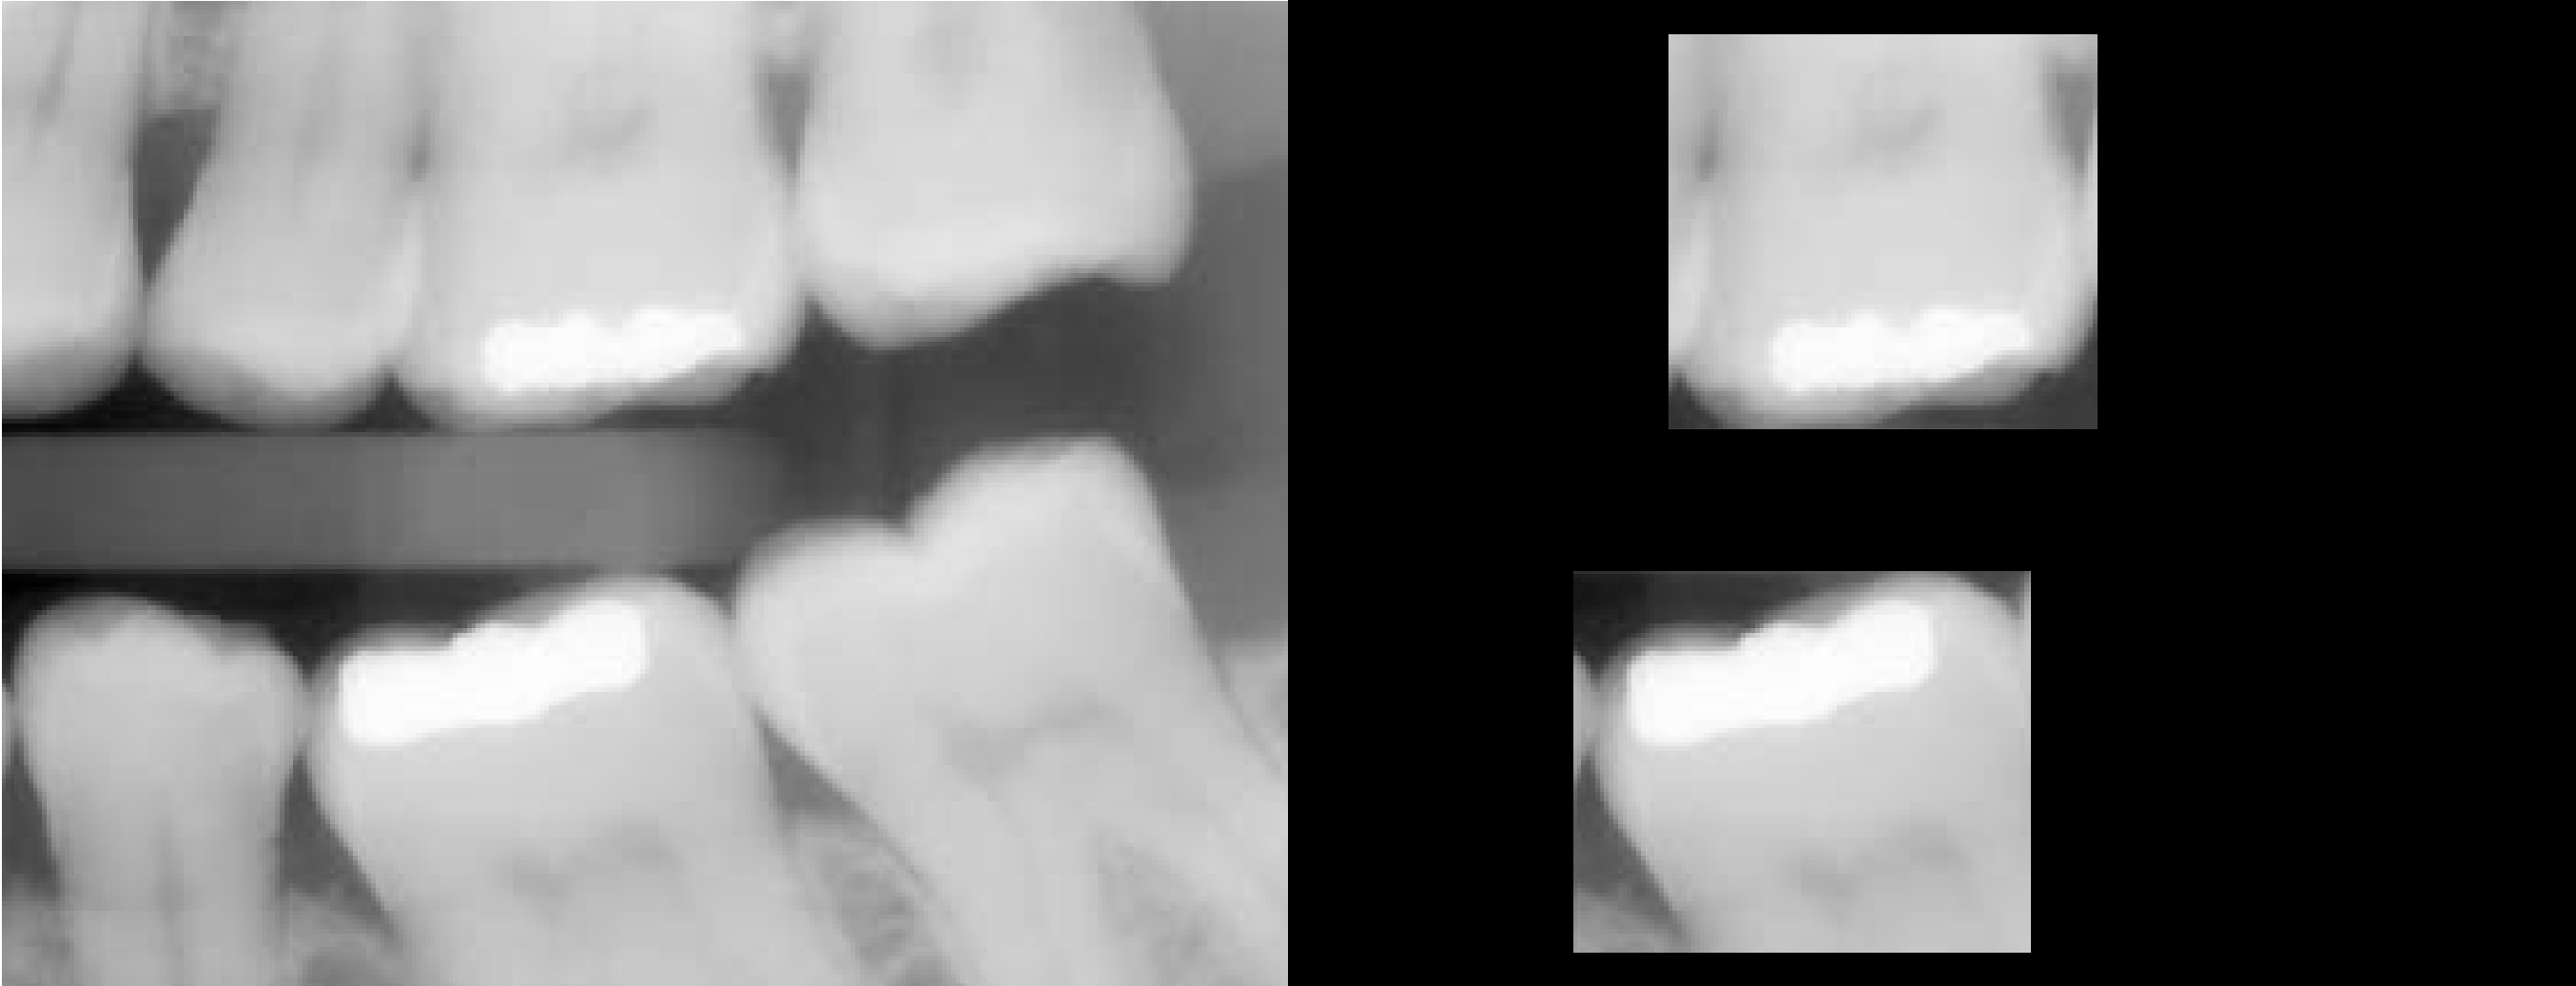

In [8]:
# Jawaban Tugas 4
imgSource = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/Images/teeth.jpg')
masking = np.zeros(imgSource.shape, imgSource.dtype)
masking = cv.rectangle(masking, (300, 1000), (780, 600), (255,255,255), -1)
masking = cv.rectangle(masking, (400, 450), (850, 36), (255,255,255), -1)
result = cv.bitwise_and(imgSource, masking)

resultFrame = cv.hconcat((imgSource, result))
cv2_imshow(resultFrame)

In [ ]:
# Jawaban Tugas 5

imgResource = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/Images/teeth.jpg')

# AND

mask = np.zeros(imgResource.shape, dtype=np.uint8)
mask = cv.circle(mask, (255,300), 230, (255,255,255), -1)

result = cv.bitwise_and(imgResource, mask)

rose_frame = cv.hconcat((imgResource, result))
cv2_imshow(rose_frame)

# OR

mask = np.zeros(imgResource.shape, dtype=np.uint8)
mask = cv.circle(mask, (255,300), 230, (255,255,255), -1)

result = cv.bitwise_or(imgResource, mask)

rose_frame = cv.hconcat((imgResource, result))
cv2_imshow(rose_frame)

# NOT

mask = np.zeros(imgResource.shape, dtype=np.uint8)
mask = cv.circle(mask, (255,300), 230, (255,255,255), -1)

result = cv.bitwise_not(imgResource, mask)

rose_frame = cv.hconcat((imgResource, result))
cv2_imshow(rose_frame)